In [102]:
import pandas as pd

In [103]:
data_url='https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

In [104]:
#getting dataset
df = pd.read_csv(data_url, header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [105]:
# Column names
columns=['buying',
'maint',
'doors',
'persons',
'lug_boot',
'safety',
'class',
]

In [106]:
#getting the data with column names
df=pd.read_csv(data_url,header=None, names=columns)
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [107]:
from sklearn.preprocessing import OrdinalEncoder
from numpy import asarray

oe = OrdinalEncoder()
for i in df.columns:
    cd=asarray(df[i])
    df[i]=oe.fit_transform(cd.reshape(-1,1))

df.sample(10)

,buying,maint,doors,persons,lug_boot,safety,class
621,0.0,0.0,3.0,0.0,2.0,1.0,2.0
1231,2.0,1.0,1.0,1.0,0.0,2.0,1.0
1319,1.0,3.0,0.0,2.0,1.0,0.0,0.0
1119,2.0,2.0,1.0,1.0,1.0,1.0,2.0
1621,1.0,1.0,0.0,0.0,2.0,2.0,2.0
238,3.0,2.0,0.0,2.0,1.0,2.0,2.0
1631,1.0,1.0,0.0,1.0,2.0,0.0,1.0
343,3.0,1.0,0.0,2.0,2.0,2.0,2.0
1570,1.0,2.0,2.0,0.0,1.0,2.0,2.0
661,0.0,2.0,0.0,1.0,1.0,2.0,2.0


In [108]:
#Defining Feature and target
X,y=df.drop(['class'], axis=1), df['class']

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, 
                                    random_state=0,stratify=y)


In [110]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
cov_mat = np.cov(X_train_scaled.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)

In [111]:
#Choosing how many features will be enough
total = sum(eigen_values)
var_explained= [(eig_val/total) for eig_val in sorted(eigen_values, reverse=True)]
np.array(var_explained)*100

array([17.2282167 , 16.89922412, 16.75239777, 16.53311829, 16.46187848,
       16.12516464])

In [112]:
cum_var_exp=np.cumsum(var_explained)
cum_var_exp

array([0.17228217, 0.34127441, 0.50879839, 0.67412957, 0.83874835,
       1.        ])

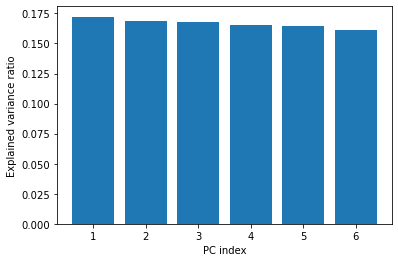

In [113]:
import matplotlib.pyplot as plt
plt.bar(range(1,7), var_explained, alpha=1, align='center')
#plt.step(range(1,5), cum_var_exp, where='mid')
plt.xlabel('PC index')
plt.ylabel('Explained variance ratio')
#plt.legend('best')
plt.show()

In [114]:
#3. Consider the necessary number of components to explain at least a **99% of the variance**. Give the equations to calculate these components.
sorted_index=pd.Series(eigen_values).sort_values(ascending=False).index
w=eigen_vectors[:, sorted_index[:6]]
X_train_pca = X_train_scaled.dot(w)
X_test_pca = X_test_scaled.dot(w)
y_train.unique()

array([0., 2., 1., 3.])

In [115]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=20, criterion='entropy')
clf.fit(X_train_pca,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [116]:
pred =clf.predict(X_test_pca)

In [117]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)
print('Accuracy:',(acc*100).round(2),'%')

Accuracy: 81.21 %


In [118]:
rfc=RandomForestClassifier()

In [119]:
param_grid = { 
    'n_estimators': [200, 500, 800, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [120]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500, 800, 1000]})

In [121]:
df_Gr = pd.DataFrame(CV_rfc.cv_results_)
dfn = pd.DataFrame(df_Gr[['param_criterion','param_max_depth','param_max_features','param_n_estimators','mean_test_score']])

In [122]:
res_df=dfn.sort_values(by='mean_test_score',ascending=False)
res_df.head(5)

,param_criterion,param_max_depth,param_max_features,param_n_estimators,mean_test_score
117,entropy,8,log2,500,0.793047
115,entropy,8,sqrt,1000,0.790878
116,entropy,8,log2,200,0.790161
111,entropy,8,auto,1000,0.790151
114,entropy,8,sqrt,800,0.788712


In [123]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 500}